> # Data Wrangling 


> IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

> LOAD TITANIC DATASET

In [2]:
Kas = sns.load_dataset("Titanic")

> GET DATA DETAILS

In [3]:
Kas.head()
Kas.shape

(891, 15)

> CHECKING FIRST 10 ROWS OF 'AGE' COLUMN

In [4]:
# simple operations (maths operator)
(Kas["age"]+6).head(10)
# the above code will add 6 in age col

0    28.0
1    44.0
2    32.0
3    41.0
4    41.0
5     NaN
6    60.0
7     8.0
8    33.0
9    20.0
Name: age, dtype: float64

## - Dealing with missing values
    - In as data missing values are either: N/A/NaN/0/blank cell
    - if we have missing value in any col or row
## - Perform the following Steps:

    1. Recollect the data and check the mistakes
   
    2. remove the column having missing values if is not effecting the whole data or useless
   
    3. Replace the missing value
   
       1. How
          1. Take Average/Mean of entire columns and replace that with missing values
          2. frequency/ MODE replacement
          3. USE ML Algorithms
          4. Leave it like that
       2. Why?
          1. its better because no data is lost
          2. Avoid less accuracy
     




In [5]:
#Find where exactly missing values are
Kas.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
#removing null values from a column:deck
Kas.dropna(subset=["deck"], axis=0, inplace= True)
#inplace=True will made the changes in original dataframe
print(Kas.shape)

(203, 15)


In [7]:
Kas.isnull().sum()

survived        0
pclass          0
sex             0
age            19
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
deck            0
embark_town     2
alive           0
alone           0
dtype: int64

In [8]:
#remove null values from whole dataset
Kas=Kas.dropna()
Kas.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [9]:
Kas.shape

(182, 15)

### Replacing missing values 
    -  by taking mean/average of relevant column

In [10]:
kas1 = sns.load_dataset("titanic")

In [11]:
kas1.shape

(891, 15)

In [12]:
# Finding mean of age column as it contains 177 missing values
mean= kas1["age"].mean()
mean

29.69911764705882

In [13]:
#replacing NaN with mean of the data ( also updating the column)
kas1["age"]=kas1["age"].replace(np.nan, mean)

In [14]:
kas1.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

> ## Replacing NaN values of "deck" & "embark_town" Column

In [15]:
Kas['deck'] = Kas['deck'].fillna(Kas['deck'].mode()[0])

In [16]:
Kas.dropna()
Kas.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

> ## Data Formatting
- Make the data as per standardized format
- Make sure that the data is consistent and understandable
  - easy to gather
  - easy to workwith
  - names should be uniformed 
    - e.g use Lahore or LHR on all place dont mix
  - if a columns has different unit like kg, g or pounds, make a single unit for all entries i.e: all entries should b kg/g etc
  - one standard unit for each col
  - 

In [17]:
# check data types of columns
kas1.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

> ## TYPECASTING

In [18]:
# convert data type of one column into other
Kas["survived"] = Kas["survived"].astype("float64")

In [19]:
Kas.dtypes

survived       float64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [20]:
# converting age cols into days instead of years
kas1["age"] = kas1["age"]*365
kas1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,8030.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,13870.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,9490.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,12775.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,12775.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


> ## Removing decimal numbers from "age" Column

In [21]:
kas1["age"] = kas1["age"].astype("int64")
kas1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,8030,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,13870,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,9490,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,12775,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,12775,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
# renaming column name
kas1.rename(columns={"age":"age in days"}, inplace=True)
kas1.head()

,survived,pclass,sex,age in days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,8030,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,13870,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,9490,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,12775,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,12775,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


> ## Data Normalization
- Makes the data uniform
- They have same impact
- bring both variables or datasets in a range for making comparison
- Also for computational purpose

In [23]:
kas1.head()

,survived,pclass,sex,age in days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,8030,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,13870,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,9490,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,12775,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,12775,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
kas2 = kas1[["age in days", "fare"]]
kas2.head()

,age in days,fare
0,8030,7.2500
1,13870,71.2833
2,9490,7.9250
3,12775,53.1000
4,12775,8.0500


The above data is in above range as values in age in days and values in fare have huge gap, here we need to normalize the data

> ## Methods to normalize the data
1. simple feature scaling
   - x(new)= x(old)/x(max)
2. Min-Max method
3. Z-score (standard score) -3 to +3 (0 to 3)
4. Log transformation
   

> ## Method-1: Simple Feature Scaling

In [25]:
kas2["fare"] = kas2["fare"]/kas2["fare"].max()
kas2["age in days"] = kas2["age in days"]/kas2["age in days"].max()
kas2.head()


C:\Users\My Net\AppData\Local\Temp\ipykernel_8120\956855613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kas2["fare"] = kas2["fare"]/kas2["fare"].max()
C:\Users\My Net\AppData\Local\Temp\ipykernel_8120\956855613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kas2["age in days"] = kas2["age in days"]/kas2["age in days"].max()


,age in days,fare
0,0.2750,0.014151
1,0.4750,0.139136
2,0.3250,0.015469
3,0.4375,0.103644
4,0.4375,0.015713


> ## Method-2: Min-Max 

In [26]:

kas1["fare"] = (kas1["fare"]-kas1["fare"].min())/(kas1["fare"]-kas1["fare"].max())
kas1.head()


,survived,pclass,sex,age in days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,8030,1,0,-0.014354,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,13870,1,0,-0.161623,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,9490,0,0,-0.015712,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,12775,1,0,-0.115629,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,12775,0,0,-0.015963,S,Third,man,True,NaN,Southampton,no,True


> ## Method-3: Z-score

In [27]:

kas2["fare"] = kas2["fare"]-kas2["fare"].mean()
kas2["age in days"] = kas2["age in days"]-kas2["age in days"].mean()
kas2.head()

C:\Users\My Net\AppData\Local\Temp\ipykernel_8120\2287191071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kas2["fare"] = kas2["fare"]-kas2["fare"].mean()
C:\Users\My Net\AppData\Local\Temp\ipykernel_8120\2287191071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kas2["age in days"] = kas2["age in days"]-kas2["age in days"].mean()


,age in days,fare
0,-0.096237,-0.048707
1,0.103763,0.076277
2,-0.046237,-0.047390
3,0.066263,0.040786
4,0.066263,-0.047146


> ## Method-4: Log Transformation

In [28]:
k= sns.load_dataset("titanic")
k["fare"] = np.log(k["fare"])
k.head()

C:\Users\My Net\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


> ## Bining
- Grouping values (less or more continous) into smaller number of bins
- convert numeric into categories (child, young, old) etc
- To have better understanding of groups
  - low vs mid high price

> ## Bining "age" column into three groups

In [29]:
K5=sns.load_dataset("titanic")
K5=K5.dropna()
K5.isnull().sum()
K5["age"] = K5["age"].astype("int64")

bins = K5['age'].value_counts(bins=4, sort=True)
bins= np.sort(bins)
age_groups = ["Childern", " Young", " Old"]
K5["age"]= pd.cut(K5["age"], bins, labels= age_groups, include_lowest=True)
K5=K5.dropna()
K5.isnull().sum()
K5.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,Young,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,Young,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,Young,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,Old,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
21,1,2,male,Young,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True


> ## converting categories into dummies
- easy to use for computations
- e.g male,female=0,1

In [30]:

pd.get_dummies(kas1["sex"])
kas1.head()

,survived,pclass,sex,age in days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,8030,1,0,-0.014354,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,13870,1,0,-0.161623,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,9490,0,0,-0.015712,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,12775,1,0,-0.115629,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,12775,0,0,-0.015963,S,Third,man,True,NaN,Southampton,no,True


> ## How to get dummies to change data inside a dataframe?

In [31]:
kk = sns.load_dataset("titanic")
kk = pd.get_dummies(kk, columns=['sex'])
kk.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_female,sex_male
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0,1
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,0
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,0
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,0
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,1


> ## More Explanation of Bining

In [32]:
import matplotlib.pyplot as plt

In [33]:
kk = sns.load_dataset("titanic")

In [34]:
kk.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [35]:
kk["age"].dtype

dtype('float64')

In [36]:
kk["age"].isnull().sum()


177

In [37]:
kk["age"].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: age, Length: 714, dtype: float64

# disturibute data into equal parts
- As in our example we want to divide age column into three equal parts.

In [38]:

np.linspace(1,90, 3)

array([ 1. , 45.5, 90. ])

In [39]:
#create bins
bins = np.linspace(min(kk["age"]), max(kk["age"]), 5) # we need 3 bins but we always mention 1+ bin_number
bins


array([ 0.42 , 20.315, 40.21 , 60.105, 80.   ])

In [40]:
group_names =["Child", "young","middle-age","old"]


In [41]:
#perform bins
kk["age_binned"] = pd.cut(kk["age"], bins, labels=group_names, include_lowest= True)


In [42]:
kk[["age","age_binned"]].head(20)

,age,age_binned
0,22.0,young
1,38.0,young
2,26.0,young
3,35.0,young
4,35.0,young
5,NaN,NaN
6,54.0,middle-age
7,2.0,Child
8,27.0,young
9,14.0,Child


In [43]:
kk["age_binned"].value_counts(sort= True)
# shows number of childs, young and old people in dataset

young         385
Child         179
middle-age    128
old            22
Name: age_binned, dtype: int64

Text(0, 0.5, 'frequency')

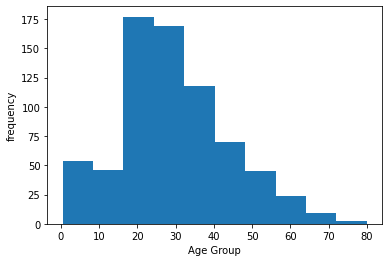

In [44]:
plt.hist(kk["age"])
plt.xlabel("Age Group")
plt.ylabel("frequency")